In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing

#visualization library
import matplotlib.pyplot as plt
import seaborn as sns
#processing library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox,skew,norm
import sklearn.metrics as metrics

In [2]:
xls = pd.ExcelFile('Bank_Personal_Loan_Modelling-1.xlsx')

In [3]:
xls.sheet_names

['Description', 'Data']

In [4]:
#reading data file
bank_data = pd.read_excel('Bank_Personal_Loan_Modelling-1.xlsx',sheet_name='Data')

In [5]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
bank_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
bank_data.isna().any().sum()

0

#No missing values and all attributes are numerical

In [9]:
bank_data.describe(include='all').T#Decriptive Statistics

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
bank_data.drop('ID',axis=1,inplace=True)

In [11]:
bank_data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [12]:
#pair plot

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


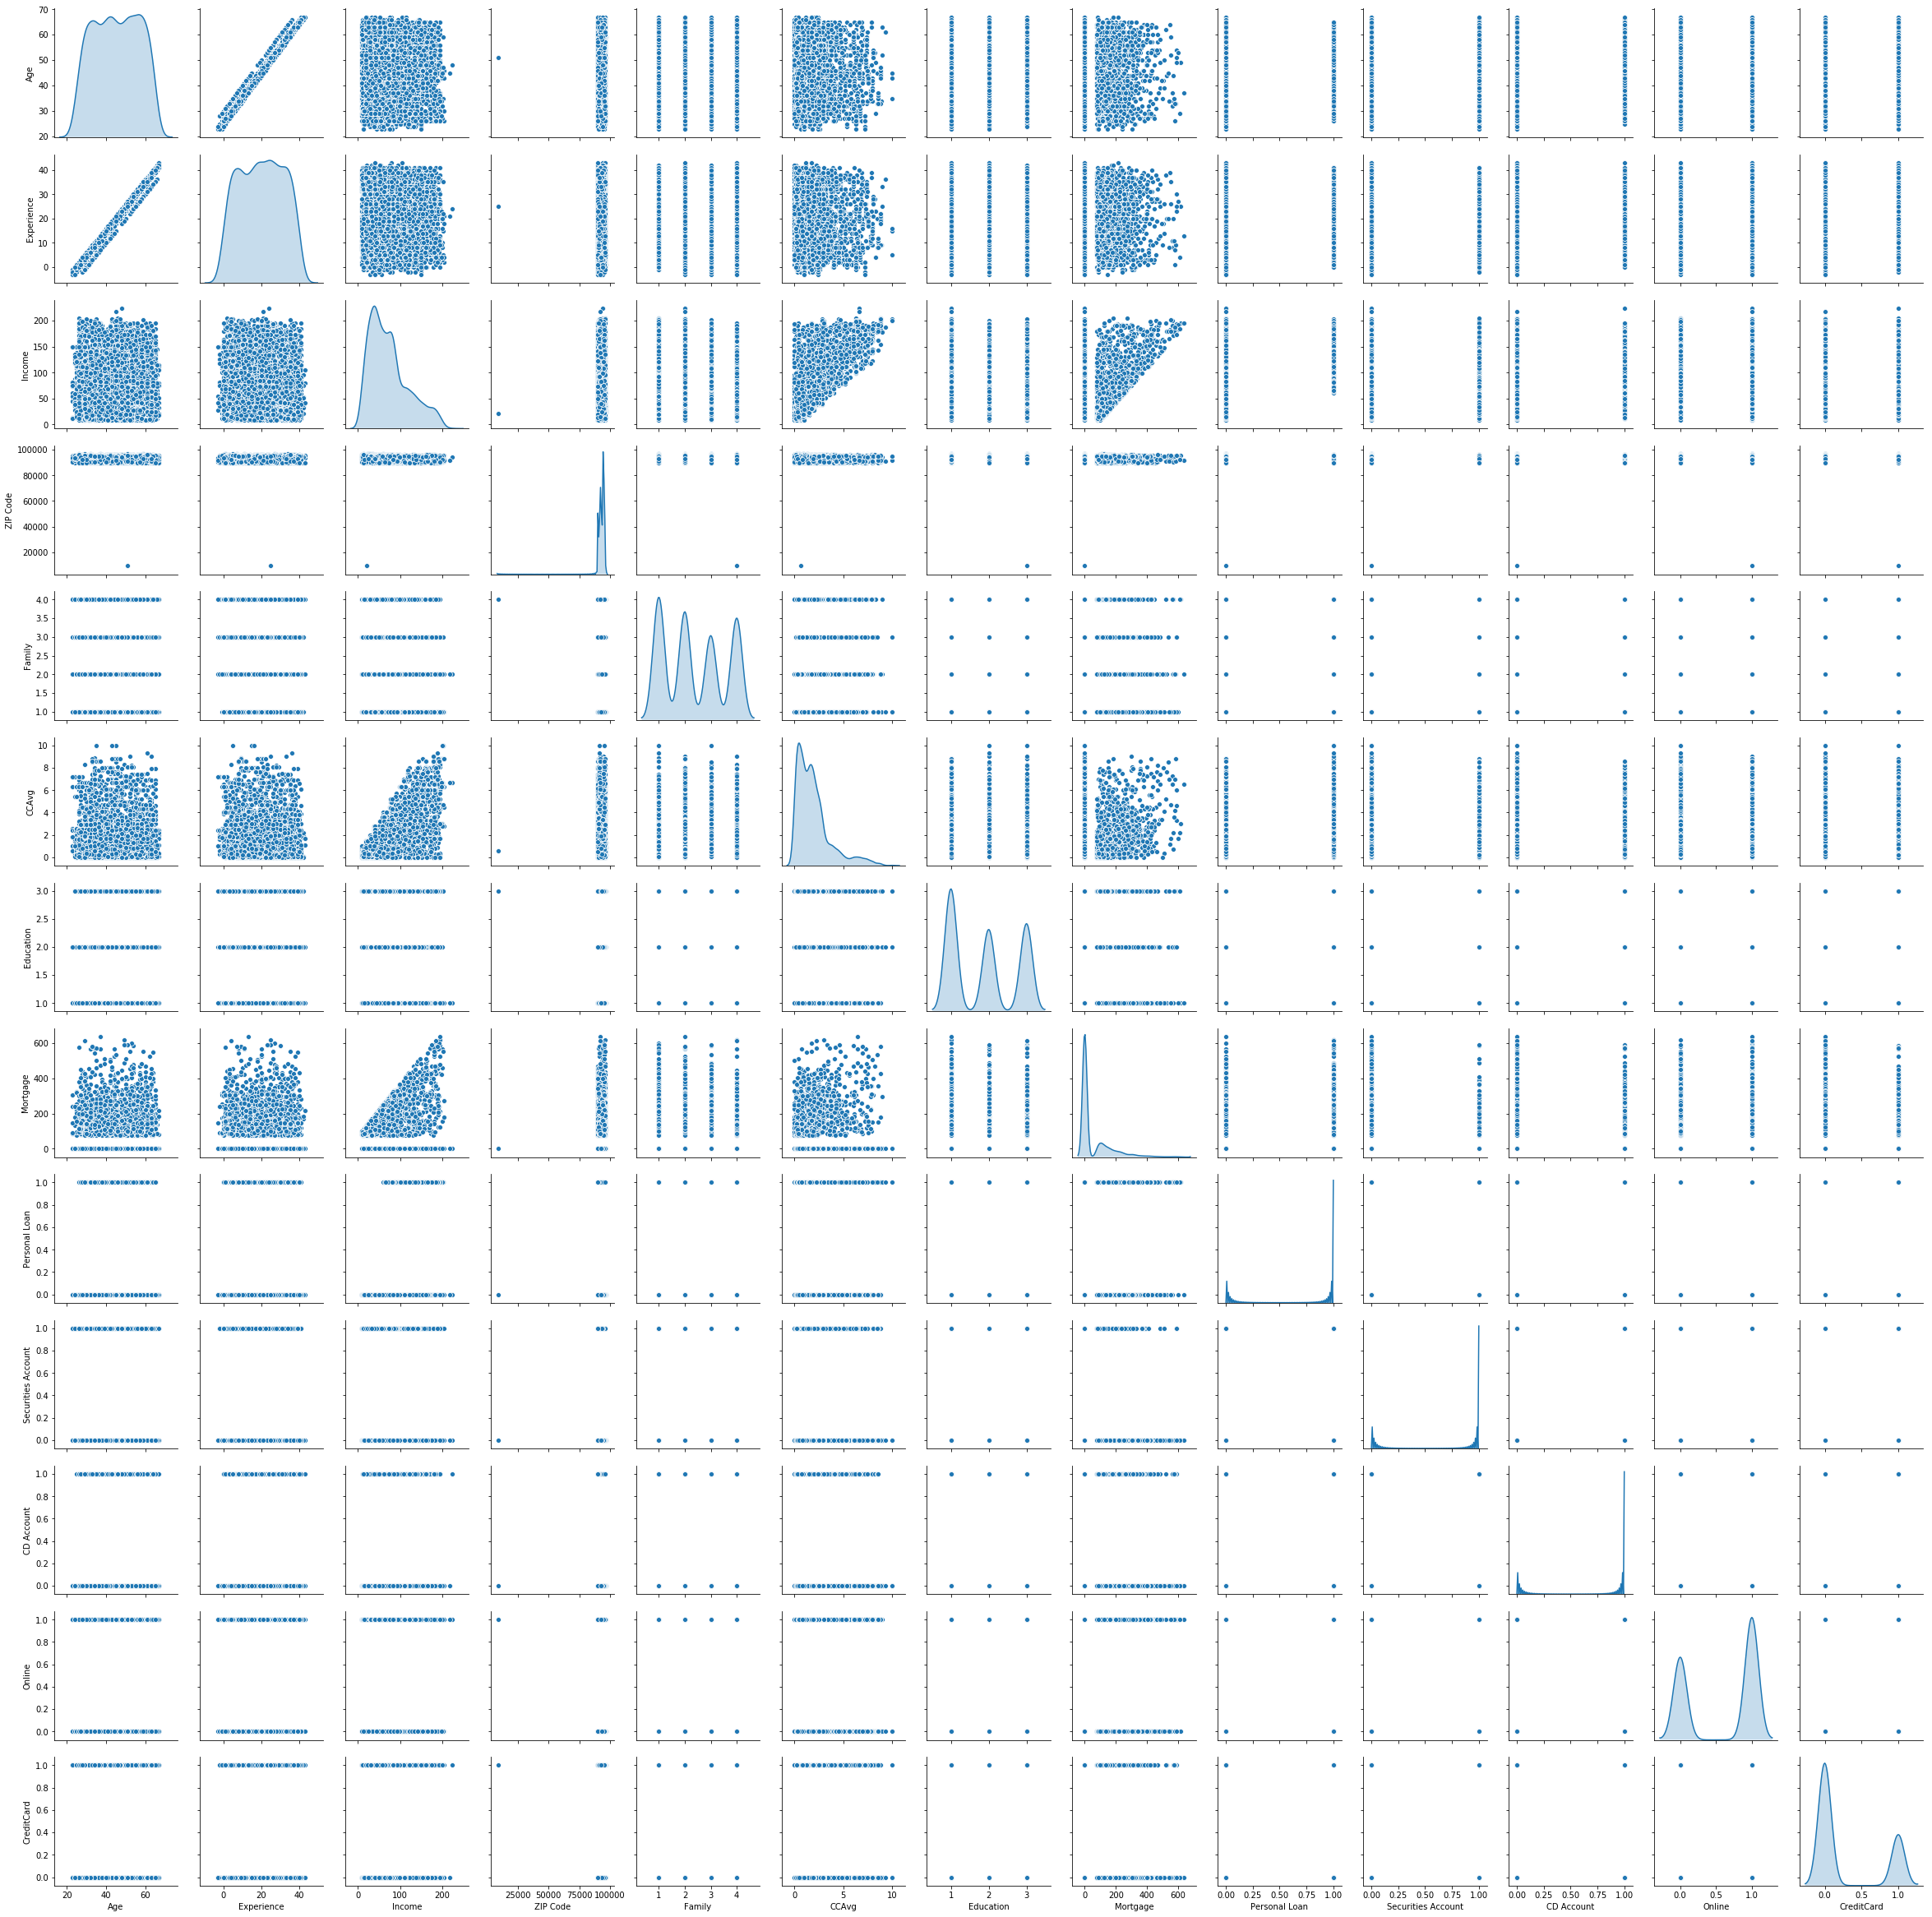

In [13]:
sns.pairplot(bank_data,diag_kind='kde')

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


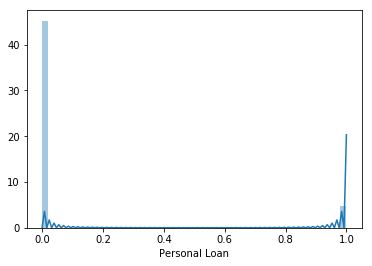

In [14]:
sns.distplot(bank_data['Personal Loan'],kde =True)

In [15]:
# Target variable binary class so concentrated in both ends

In [16]:
#Splitting the data into training and test set in the ratio of 70:30 respectively

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = bank_data.drop('Personal Loan',axis =1)
y = bank_data['Personal Loan']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= .3,random_state= 3)

In [20]:
sc =StandardScaler()

In [21]:
#scaling data
x_train_scld =sc.fit_transform(x_train)
x_test_scaled =sc.transform(x_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [22]:
##Import libraries for classificatio model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [23]:
#ML Object
dt =DecisionTreeClassifier(criterion='entropy',random_state=1)
nv = GaussianNB()
lr = LogisticRegression()
rf_model =RandomForestClassifier(criterion='entropy',random_state=1)
knn = KNeighborsClassifier()

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [25]:
params={'max_depth':np.arange(1,15)}
gs = GridSearchCV(dt,params,cv=3)
gs.fit(x_train_scld,y_train)
print(gs.best_params_)

params1={'max_depth':np.arange(1,15),'n_estimators':np.arange(1,100)}
gs = GridSearchCV(rf_model,params1,cv=3)
gs.fit(x_train_scld,y_train)
print(gs.best_params_)

params2={'n_neighbors':np.arange(1,15)}
gs = GridSearchCV(knn,params2,cv=3)
gs.fit(x_train_scld,y_train)
print(gs.best_params_)

{'max_depth': 5}
{'n_estimators': 21, 'max_depth': 10}
{'n_neighbors': 3}


In [26]:
dt =DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=5)
rf_model =RandomForestClassifier(criterion='entropy',random_state=1,max_depth=10,n_estimators=21)
knn = KNeighborsClassifier(n_neighbors=3)

In [27]:
models =[]
models.append(('Decisiontree',dt))
models.append(('Naivesbaise',nv))
models.append(('knn',knn))
models.append(('lr',lr))

Decisiontree: 0.985429(0.000695)
Naivesbaise: 0.883713(0.002946)
knn: 0.953145(0.006448)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr: 0.952857(0.007370)


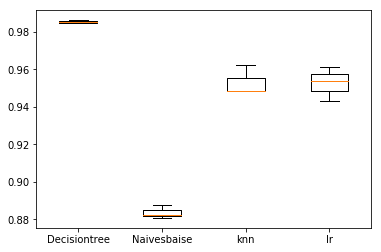

In [28]:
#comparing each algorithm performance using cross validation
from sklearn import model_selection
results =[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=3,random_state=1)
#     print(kfold,"kkff")
    cv_results =model_selection.cross_val_score(model,x_train_scld,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)
fig =plt.figure()
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Decission tree have high accuray and low variance so selecting decision tree classifier

In [29]:
dt.fit(x_train_scld,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [30]:
dt.score(x_train_scld,y_train)#train data

0.9917142857142857

In [31]:
dt.score(x_test_scaled,y_test)#test data

0.9773333333333334

In [32]:
#checking the bootstrap confidence interval
from sklearn.utils import resample

In [43]:
bank_data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [59]:
# configure bootstrap
n_iterations = 100            # Number of bootstrap samples to create
n_size = int(len(bank_data) * 0.25)    # picking only 50 % of the given data in every bootstrap sample
values = sc.fit_transform(bank_data)
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	train = pd.DataFrame(train,columns=bank_data.columns)  
	test = pd.DataFrame(test,columns=bank_data.columns)   
	model =dt
	train.iloc[:,8] = train.iloc[:,8].astype('int64')
	test.iloc[:,8] = test.iloc[:,8].astype('int64')
	model.fit(train.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12]], train.iloc[:,8])
    # evaluate model
	predictions = model.predict(test.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12]])
	score = metrics.accuracy_score(test.iloc[:,8], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
	stats.append(score)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


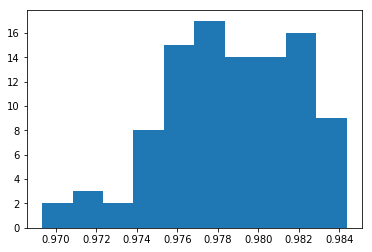

95.0 confidence interval 97.2% and 98.4%


In [60]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100            # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#95% confidence interval is between 97% to 98%

In [ ]:
#decision tree is  performing well in both test and train data.

In [61]:
## Doing ensemble method to improving the accuracy

In [64]:
# random forest

rf_model.fit(x_train_scld,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [65]:
rf_model.score(x_train_scld,y_train)#train data

0.9982857142857143

#Accuracy increased to 99.1 to 99.8%

In [66]:
rf_model.score(x_test_scaled,y_test)#test data

0.978

#Accuracy increased to 97 to 97.8%

In [67]:
# configure bootstrap
n_iterations = 100            # Number of bootstrap samples to create
n_size = int(len(bank_data) * 0.25)    # picking only 50 % of the given data in every bootstrap sample
values = sc.fit_transform(bank_data)
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	train = pd.DataFrame(train,columns=bank_data.columns)  
	test = pd.DataFrame(test,columns=bank_data.columns)   
	model =rf_model
	train.iloc[:,8] = train.iloc[:,8].astype('int64')
	test.iloc[:,8] = test.iloc[:,8].astype('int64')
	model.fit(train.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12]], train.iloc[:,8])
    # evaluate model
	predictions = model.predict(test.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12]])
	score = metrics.accuracy_score(test.iloc[:,8], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
	stats.append(score)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


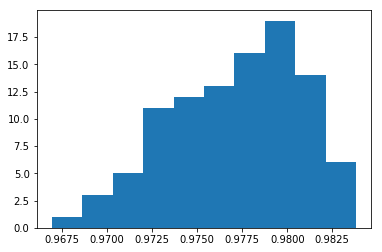

95.0 confidence interval 97.0% and 98.2%


In [68]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100            # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:
#95% confidence interval is between 97% to 98%